# XGboost

In [938]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.3.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [939]:
import xgboost as xgb
import pandas as pd
import numpy as np
from datetime import datetime
import talib

In [940]:
df = pd.read_csv("stockdata.csv",encoding = 'big5')

In [941]:
df.head()

,證券代碼,年月日,開盤價,最高價,最低價,收盤價,成交量,收盤價(元),報酬率％
0,2330,2010/1/4,65.0,65.0,64.0,64.9,39511.0,47.28,0.62
1,2317,2010/1/4,152.0,152.5,150.5,151.5,23703.0,63.93,0.00
2,3008,2010/1/4,428.0,428.0,415.5,416.0,1035.0,364.38,-1.19
3,1301,2010/1/4,67.3,67.4,66.6,67.0,5963.0,46.20,-0.45
4,2412,2010/1/4,59.5,59.6,59.1,59.3,14947.0,51.32,-0.34


In [942]:
df.columns=['code','date','open','high','low','close','volume',"adjclose", "return"]

In [943]:
df["return"] = df["return"]/100

In [944]:
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d').dt.strftime("%Y-%m-%d");

In [945]:
df2330 = df[df.loc[:, "code"] == 2330]

In [946]:
df2330.loc[:,'RSI'] = talib.RSI(df2330['close'].values.astype('float64'))

C:\Users\dick_\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\dick_\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [947]:
df2330["ADX"] = talib.ADX(df2330['high'].values, df2330['low'].values, df2330['close'].values, timeperiod = 14)

C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [948]:
df2330["SAR"] = talib.SAR(df2330['high'].values, df2330['low'].values, acceleration=0.2)

C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [949]:
for i in range(5,0,-1):
    df2330["open"+str(i)] = df2330["open"].shift(i)
    df2330["high"+str(i)] = df2330["high"].shift(i)
    df2330['low'+str(i)] = df2330['low'].shift(i)
    df2330["close"+str(i)] = df2330["close"].shift(i)
    df2330["volume"+str(i)] = df2330["volume"].shift(i)
    df2330["adjclose"+str(i)] = df2330["adjclose"].shift(i)
    df2330["return"+str(i)] = df2330["return"].shift(i)
    df2330["RSI"+str(i)] = df2330["RSI"].shift(i)
    df2330["ADX"+str(i)] = df2330["ADX"].shift(i)
    df2330["SAR"+str(i)] = df2330["SAR"].shift(i)

C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [950]:
df2330.head()

,code,date,open,high,low,close,volume,adjclose,return,RSI,...,open1,high1,low1,close1,volume1,adjclose1,return1,RSI1,ADX1,SAR1
0,2330,2010-01-04,65.0,65.0,64.0,64.9,39511.0,47.28,0.0062,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2330,2010-01-05,65.0,65.1,63.9,64.5,38394.0,46.98,-0.0062,NaN,...,65.0,65.0,64.0,64.9,39511.0,47.28,0.0062,NaN,NaN,NaN
40,2330,2010-01-06,64.5,64.9,63.7,64.9,52734.0,47.28,0.0062,NaN,...,65.0,65.1,63.9,64.5,38394.0,46.98,-0.0062,NaN,NaN,63.9
60,2330,2010-01-07,64.9,65.0,64.2,64.2,53294.0,46.77,-0.0108,NaN,...,64.5,64.9,63.7,64.9,52734.0,47.28,0.0062,NaN,NaN,65.1
80,2330,2010-01-08,63.5,64.3,63.5,64.0,48047.0,46.62,-0.0031,NaN,...,64.9,65.0,64.2,64.2,53294.0,46.77,-0.0108,NaN,NaN,65.1


In [951]:
df2330 = df2330.dropna()

In [952]:
from sklearn import model_selection, ensemble, preprocessing, metrics
from xgboost import XGBClassifier

In [953]:
xgbc = XGBClassifier()

In [954]:
df2330['label'] = (df2330.close - df2330.close.shift(1)) > 0

In [955]:
X = df2330[['open1', 'high1', 'low1', 'close1', 'volume1', "RSI1", "ADX1", "SAR1", "adjclose1", "return1",
               'open2', 'high2', 'low2', 'close2', 'volume2', "RSI2", "ADX2", "SAR2", "adjclose2", "return2",
               'open3', 'high3', 'low3', 'close3', 'volume3', "RSI3", "ADX3", "SAR3", "adjclose3", "return3",
               'open4', 'high4', 'low4', 'close4', 'volume4', "RSI4", "ADX4", "SAR4", "adjclose4", "return4",
               'open5', 'high5', 'low5', 'close5', 'volume5', "RSI5", "ADX5", "SAR5", "adjclose5", "return5"]]
y = df2330['label']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [956]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [957]:
print('The accuracy of eXtreme Gradient Boosting Classifier on testing set', xgbc.score(X_test, y_test))

The accuracy of eXtreme Gradient Boosting Classifier on testing set 0.4755784061696658


C:\Users\dick_\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# LSTM

In [958]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM
import scipy

In [959]:
#變數處理
df2330 = df[df.loc[:, "code"] == 2330]
df2330.loc[:,'RSI'] = talib.RSI(df2330['close'].values.astype('float64'))
df2330["ADX"] = talib.ADX(df2330['high'].values, df2330['low'].values, df2330['close'].values, timeperiod = 14)
df2330["SAR"] = talib.SAR(df2330['high'].values, df2330['low'].values, acceleration=0.2)

for i in range(5,0,-1):
    df2330["open"+str(i)] = df2330["open"].shift(i)
    df2330["high"+str(i)] = df2330["high"].shift(i)
    df2330['low'+str(i)] = df2330['low'].shift(i)
    df2330["close"+str(i)] = df2330["close"].shift(i)
    df2330["volume"+str(i)] = df2330["volume"].shift(i)
    df2330["adjclose"+str(i)] = df2330["adjclose"].shift(i)
    df2330["return"+str(i)] = df2330["return"].shift(i)
    df2330["RSI"+str(i)] = df2330["RSI"].shift(i)
    df2330["ADX"+str(i)] = df2330["ADX"].shift(i)
    df2330["SAR"+str(i)] = df2330["SAR"].shift(i)
    
df2330['label'] = (df2330.close - df2330.close.shift(1)) > 0


C:\Users\dick_\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\dick_\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [960]:
df2330.drop(df.columns[[0,1]], axis=1, inplace=True)
df2330.head()

C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,open,high,low,close,volume,adjclose,return,RSI,ADX,SAR,...,high1,low1,close1,volume1,adjclose1,return1,RSI1,ADX1,SAR1,label
0,65.0,65.0,64.0,64.9,39511.0,47.28,0.0062,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
20,65.0,65.1,63.9,64.5,38394.0,46.98,-0.0062,NaN,NaN,63.9,...,65.0,64.0,64.9,39511.0,47.28,0.0062,NaN,NaN,NaN,False
40,64.5,64.9,63.7,64.9,52734.0,47.28,0.0062,NaN,NaN,65.1,...,65.1,63.9,64.5,38394.0,46.98,-0.0062,NaN,NaN,63.9,True
60,64.9,65.0,64.2,64.2,53294.0,46.77,-0.0108,NaN,NaN,65.1,...,64.9,63.7,64.9,52734.0,47.28,0.0062,NaN,NaN,65.1,False
80,63.5,64.3,63.5,64.0,48047.0,46.62,-0.0031,NaN,NaN,65.0,...,65.0,64.2,64.2,53294.0,46.77,-0.0108,NaN,NaN,65.1,False


In [961]:
df2330 = df2330.dropna()

In [962]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [963]:
def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(50, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(80, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(50,activation='relu'))
        model.add(Dense(1,init='uniform',activation='sigmoid'))
        model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
        return model

In [965]:
window = 1
X_train, y_train, X_test, y_test = load_data(df2330[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1748, 1, 61)
y_train (1748,)
X_test (194, 1, 61)
y_test (194,)


In [966]:
model = build_model2([61,window,1])

C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  if __name__ == '__main__':


In [967]:
model.fit(
    X_train,
    y_train,
    batch_size=80,
    nb_epoch=50,
    validation_split=0.2,
    verbose=0)

C:\Users\dick_\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [968]:
score = model.evaluate(X_test,y_test,verbose=2)
print('The accuracy of eXtreme Gradient Boosting Classifier on testing set:')
score[1]

The accuracy of eXtreme Gradient Boosting Classifier on testing set:


0.5103092783505154

In [969]:
#### diff=[]
ratio=[]
p = model.predict_classes(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))

C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\dick_\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


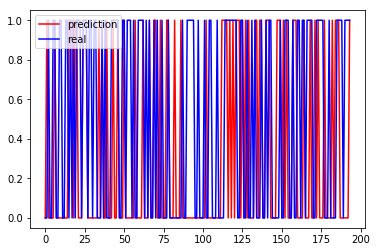

In [970]:
#畫圖比較
import matplotlib.pyplot as plt2
plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='real')
plt2.legend(loc='upper left')
plt2.show()